## Лабораторная работа №1

#### Конечномерная оптимизация, градиентные методы

Постановка задачи:

1. Выбрать две тестовые функции для оптимизации,
2. Реализовать алгоритм градиентного спуска (GD),
3. Реализовать моментный и адаптивный методы,
4. Визуализировать алгоритмы.

In [1]:
!pip install celluloid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
#import torch
#import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, cm
from sklearn.datasets import make_blobs
from matplotlib.animation import PillowWriter
import celluloid
from celluloid import Camera
import pandas as pd
#from IPython.display import HTML, Image

### Функция Матьяса

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Формула:*</font>
<br>
$$
f(x, y) = 0.26 (x^2 + y^2) - 0.48xy,
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Глобальный минимум:*</font>
<br>
$$
f(0, 0) = 0,
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Метод поиска:*</font>
<br>
$$
-10\leq x,y\leq 10.
$$
<br>

In [23]:
def MatyasFunc(x, y):
    return 0.26 * ((x ** 2) + (y ** 2)) - 0.48 * x * y

In [24]:
def GradMatyasFunc(x, y):
    return 0.52 * x - 0.48 * y, -0.48 * x + 0.52 * y

### Функция МакКормика

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Формула:*</font>
<br>
$$
f(x, y) = \sin(x + y) + (x - y)^2 - 1.5x + 2.5y + 1,
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Глобальный минимум:*</font>
<br><br>
$$
f(-0.54719, -1.54719) = -1.91333,
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Метод поиска:*</font>
<br>
$$
-1.5\leq x\leq 4,
$$
$$
-3\leq y\leq 4,
$$
<br>

In [25]:
def McCormickFunc(x, y):
    return np.sin(x + y) + ((x - y) ** 2) - 1.5 * x + 2.5 * y + 1

In [26]:
def GradMcCormickFunc(x, y):
    part1 = 2 * x - 2 * y + np.cos(x + y) - 1.5
    part2 = 2 * y - 2 * x + np.cos(x + y) + 2.5
    return part1, part2 

### Градиентный спуск

In [27]:
def GradL(func, g_func, theta0_i, theta1_i, alpha = 0.01, eps = 0.0000001):

    theta0_i_list = []
    theta1_i_list = []
    func_list = []

    i = 0
    (theta0_i_new, theta1_i_new) = (1000, 1000)

    while (abs(func(theta0_i, theta1_i) - func(theta0_i_new, theta1_i_new)) >= eps):

        if i > 0:
            theta0_i = theta0_i_new
            theta1_i = theta1_i_new

        i += 1

        upd_theta0_i, upd_theta1_i = g_func(theta0_i, theta1_i)
        theta0_i_new = theta0_i - alpha * upd_theta0_i
        theta1_i_new = theta1_i - alpha * upd_theta1_i

        theta0_i_list.append(theta0_i_new)
        theta1_i_list.append(theta1_i_new)
        func_list.append(func(theta0_i_new, theta1_i_new))


    return i, theta0_i, theta1_i, func(theta0_i, theta1_i), theta0_i_list, theta1_i_list, func_list

### LR schedule

In [28]:
def GD_lr_schedule(func, g_func, theta0_i, theta1_i, start_lr = 0.1, drop = 0.5, rate = 10000, eps = 0.0000001):

    i = 0
    (theta0_i_new, theta1_i_new) = (1000, 1000)

    while (abs(func(theta0_i, theta1_i) - func(theta0_i_new, theta1_i_new)) >= eps):

        if i > 0:
            theta0_i = theta0_i_new
            theta1_i = theta1_i_new

        i += 1

        #if (i != 0) and (i % (1000 / 10) == 0):
         #   alpha *= 0.1

        lr = start_lr * drop ** ((1 + i) / rate)

        upd_theta0_i, upd_theta1_i = g_func(theta0_i, theta1_i)
        theta0_i_new = theta0_i - lr * upd_theta0_i
        theta1_i_new = theta1_i - lr * upd_theta1_i

    return i, theta0_i, theta1_i, func(theta0_i, theta1_i)

### Моментный метод (метод Нестерова)

In [29]:
def Nesterov_momentum(func, g_func, theta0_i, theta1_i, alpha = 0.001, gamma = 0.9, eps = 0.0000001):
    v0, v1 = 0, 0

    theta0_i_list = []
    theta1_i_list = []
    func_list = []

    i = 0
    (theta0_i_new, theta1_i_new) = (1000, 1000)

    while (abs(func(theta0_i, theta1_i) - func(theta0_i_new, theta1_i_new)) >= eps):

        if i > 0:
            theta0_i = theta0_i_new
            theta1_i = theta1_i_new

        i += 1

        upd_theta0_i, upd_theta1_i = g_func(theta0_i, theta1_i)

        v0 = gamma * v0 + alpha * upd_theta0_i
        v1 = gamma * v1 + alpha * upd_theta1_i

        theta0_i_new = theta0_i - v0
        theta1_i_new = theta1_i - v1

        theta0_i_list.append(theta0_i_new)
        theta1_i_list.append(theta1_i_new)
        func_list.append(func(theta0_i_new, theta1_i_new))

    return i, theta0_i, theta1_i, func(theta0_i, theta1_i), theta0_i_list, theta1_i_list, func_list

### Адаптивный метод (Adam метод)

In [30]:
def Adam_momentum(func, g_func, theta0_i, theta1_i, alpha = 0.01, beta0 = 0.9, beta1 = 0.999, eps = 10e-8, t = 9, epsilon = 0.0000001):
    first_moment0, first_moment1 = 0, 0
    second_moment0, second_moment1 = 0, 0

    theta0_i_list = []
    theta1_i_list = []
    func_list = []

    i = 0
    (theta0_i_new, theta1_i_new) = (1000, 1000)

    while (abs(func(theta0_i, theta1_i) - func(theta0_i_new, theta1_i_new)) >= epsilon):

        if i > 0:
            theta0_i = theta0_i_new
            theta1_i = theta1_i_new

        i += 1

        upd_theta0_i, upd_theta1_i = g_func(theta0_i, theta1_i)

        first_moment0 = beta0 * first_moment0 + (1 - beta0) * upd_theta0_i
        first_moment1 = beta0 * first_moment1 + (1 - beta0) * upd_theta1_i

        second_moment0 = beta1 * second_moment0 + (1 - beta1) * (upd_theta0_i ** 2)
        second_moment1 = beta1 * second_moment1 + (1 - beta1) * (upd_theta1_i ** 2)

        first_unbias0 = first_moment0 / (1 - beta0 ** t)
        first_unbias1 = first_moment1 / (1 - beta0 ** t)

        second_unbias0 = second_moment0 / (1 - beta1 ** t)
        second_unbias1 = second_moment1 / (1 - beta1 ** t)

        theta0_i_new = theta0_i - ((alpha * first_unbias0) / np.sqrt(second_unbias0 + eps))
        theta1_i_new = theta1_i - ((alpha * first_unbias1) / np.sqrt(second_unbias1 + eps))

        theta0_i_list.append(theta0_i_new)
        theta1_i_list.append(theta1_i_new)
        func_list.append(func(theta0_i_new, theta1_i_new))

    return i, theta0_i, theta1_i, func(theta0_i, theta1_i), theta0_i_list, theta1_i_list, func_list

### Анимация

In [31]:
def draw(func, start_x, stop_x, start_y, stop_y, title_name, x_list, y_list, z_list, gif_name, steps):
  
    x = np.linspace(start_x, stop_x, 30)
    y = np.linspace(start_y, stop_y, 30)

    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)

    # Introduce training data
    x_train = np.array([     
        [1],
        [2],
        [4],
        [5],
        [6],
        [7]
    ])

    y_train = np.array([     
        [4],
        [-12],
        [3],
        [-11],
        [-5],
        [-17]
    ])


    zs = np.array([cost_3d(x_train, y_train,       # determine costs for each pair of w and b 
                   np.array([[x]]), np.array([[y]]))  # cost_3d() only accepts wp and bp as matrices. 
                   for x, y in zip(np.ravel(X), np.ravel(Y))])

    Z = Z.reshape(X.shape)

    #fig = plt.figure(figsize=(10,10))
    
    fig = plt.figure()
    camera = Camera(fig)

    # Define which epochs/data points to plot
    a = np.arange(0, 50, 1).tolist()
    b = np.arange(50, 100, 5).tolist()
    c = np.arange(100, steps, 200).tolist()
    points = a + b + c # points we want to plot
    points = np.array(points)

   

    ax = fig.add_subplot(projection = '3d') # projection='3d'
    ax.set_title(title_name, fontsize = 30)

    
    ax.set_xlabel("x", fontsize=25, labelpad=10)
    ax.set_ylabel("y", fontsize=25, labelpad=10)
    ax.set_zlabel("z", fontsize=25, labelpad=-35) # negative value for labelpad places z-label left of z-axis.

    bb = 0 
    for i in points: 
        if bb > 0: 
            bb = bb - 1 
            continue 
        bb = 10

        #ax.plot_surface(X, Y, Z, rstride=1, cstride=1, color='b', alpha=0.35) # create surface plot
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap = cm.coolwarm, alpha = 0.35) # create surface plot
        ax.scatter(x_list[i], y_list[i], z_list[i], marker='o', s=12**2, color='red' )
        ax.tick_params(axis='both', which='major', labelsize=15) 
        leg = ax.plot(x_list[0:i], y_list[0:i], z_list[0:i], linestyle="dashed", linewidth=2, color="grey") # (dashed) lineplot

        ax.legend(leg,[f'Min = {z_list[i]}'], loc='upper right', fontsize=15)
    
        plt.tight_layout()
        camera.snap()
    
    #ax.view_init(30, -45)
    anim = camera.animate(interval = 5, repeat = False, repeat_delay = 500)

    #plt.show()


    anim.save(gif_name, writer = 'pillow')
    #HTML(anim.to_jshtml())

In [32]:
def cost_3d(x, y, w, b):  # predicts costs for every pair of w and b. 
    pred = x@w.T + b                       
    e = y - pred
    return np.mean(e ** 2)

In [33]:
#x, y = make_blobs(n_samples = 100, n_features = 1, random_state = 0)
x, y = 5, 10

### Функция Матьяса

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Формула:*</font>
<br>
$$
f(x, y) = 0.26 (x^2 + y^2) - 0.48xy,
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Глобальный минимум:*</font>
<br>
$$
f(0, 0) = 0,
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Метод поиска:*</font>
<br>
$$
-10\leq x,y\leq 10.
$$
<br>

In [34]:
x_real = 0
y_real = 0
f_real = 0

#### Градиентный метод

Gradient descent X result = 0.05590637620908012
Gradient descent Y result = 0.05590637620908012
Gradient descent function result = 0.00012502091603324816
Epochs = 12246

Diffrence X result = 0.05590637620908012
Diffrence Y result = 0.05590637620908012
Diffrence function result = 0.00012502091603324816



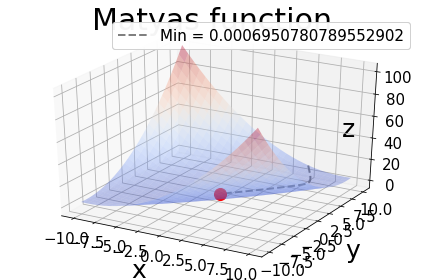

In [35]:
stepsGD, x_resGD, y_resGD, resGD, x_listGD, y_listGD, z_listGD = GradL(MatyasFunc, GradMatyasFunc, x, y)
draw(MatyasFunc, -10, 10, -10, 10, 'Matyas function', x_listGD, y_listGD, z_listGD, 'Matyas_function.gif', stepsGD)
print('Gradient descent X result = ' + str(x_resGD) + '\n' + 
      'Gradient descent Y result = ' + str(y_resGD) + '\n' + 
      'Gradient descent function result = ' + str(resGD) + '\n' +
      'Epochs = ' + str(stepsGD) + '\n')

diff_x = abs(x_real - x_resGD)
diff_y = abs(y_real - y_resGD)
diff_f = abs(f_real - resGD)
print('Diffrence X result = ' + str(diff_x) + '\n' +
      'Diffrence Y result = ' + str(diff_y) + '\n' +
      'Diffrence function result = ' + str(diff_f) + '\n')

#### LR schedule

In [36]:
stepsGD_lr, x_resGD_lr, y_resGD_lr, resGD_lr = GD_lr_schedule(MatyasFunc, GradMatyasFunc, x, y)
print('Gradient descent and learning rate schedule X result = ' + str(x_resGD_lr) + '\n' + 
      'Gradient descent and learning rate schedule Y result = ' + str(y_resGD_lr) + '\n' + 
      'Gradient descent and learning rate schedule function result = ' + str(resGD_lr) + '\n' +
      'Epochs = ' + str(stepsGD_lr) + '\n')

Gradient descent and learning rate schedule X result = 0.018646939501346948
Gradient descent and learning rate schedule Y result = 0.018646939501346948
Gradient descent and learning rate schedule function result = 1.3908334110675761e-05
Epochs = 1581



#### Метод Нестерова

Nesterov momentum X result = 0.055789453715037005
Nesterov momentum Y result = 0.055789453715037005
Nesterov momentum function result = 0.00012449852583289048
Epochs = 12216



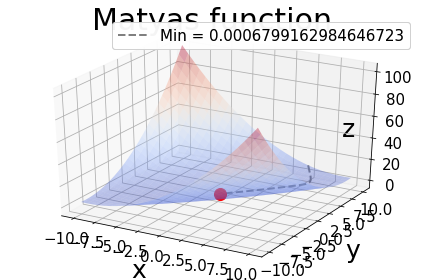

In [37]:
stepsNes, x_Nes, y_Nes, resNes, x_listNes, y_listNes, z_listNes = Nesterov_momentum(MatyasFunc, GradMatyasFunc, x, y)
draw(MatyasFunc, -10, 10, -10, 10, 'Matyas function', x_listNes, y_listNes, z_listNes, 'Matyas_Nes_function.gif', stepsNes)
print('Nesterov momentum X result = ' + str(x_Nes) + '\n' + 
      'Nesterov momentum Y result = ' + str(y_Nes) + '\n' + 
      'Nesterov momentum function result = ' + str(resNes) + '\n' +
      'Epochs = ' + str(stepsNes) + '\n')

#### Adam метод

Adam momentum X result = 0.02172661712348151
Adam momentum Y result = 0.022354756452296676
Adam momentum function result = 1.9530314717374256e-05
Epochs = 10667



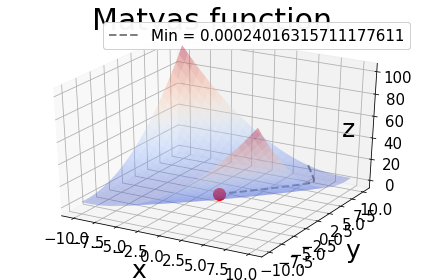

In [38]:
stepsAdam, x_Adam, y_Adam, resAdam, x_listAdam, y_listAdam, z_listAdam = Adam_momentum(MatyasFunc, GradMatyasFunc, x, y)
draw(MatyasFunc, -10, 10, -10, 10, 'Matyas function', x_listAdam, y_listAdam, z_listAdam, 'Matyas_Adam_function.gif', stepsAdam)
print('Adam momentum X result = ' + str(x_Adam) + '\n' + 
      'Adam momentum Y result = ' + str(y_Adam) + '\n' + 
      'Adam momentum function result = ' + str(resAdam) + '\n' +
      'Epochs = ' + str(stepsAdam) + '\n')

In [41]:
x, y = -1, 3

### Функция МакКормика

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Формула:*</font>
<br>
$$
f(x, y) = \sin(x + y) + (x - y)^2 - 1.5x + 2.5y + 1,
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Глобальный минимум:*</font>
<br><br>
$$
f(-0.54719, -1.54719) = -1.91333,
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Метод поиска:*</font>
<br>
$$
-1.5\leq x\leq 4,
$$
$$
-3\leq y\leq 4,
$$
<br>

In [42]:
x_real = -0.54719
y_real = -1.54719
f_real = -1.91333

#### Градиентный метод

Gradient descent X result = -0.5459181709433332
Gradient descent Y result = -1.5459181698095743
Gradient descent function result = -1.9132201185392779
Epochs = 545

Diffrence X result = 0.0012718290566667845
Diffrence Y result = 0.00127183019042576
Diffrence function result = 0.00010988146072210547



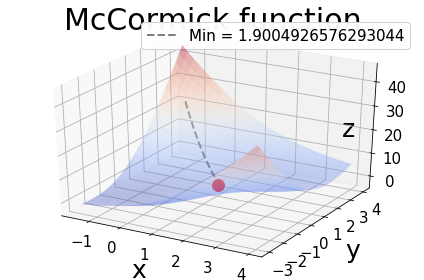

In [43]:
stepsGD, x_resGD, y_resGD, resGD, x_listGD, y_listGD, z_listGD = GradL(McCormickFunc, GradMcCormickFunc, x, y)
draw(McCormickFunc, -1.5, 4, -3, 4, 'McCormick function', x_listGD, y_listGD, z_listGD, 'McCormick_function.gif', stepsGD)
print('Gradient descent X result = ' + str(x_resGD) + '\n' + 
      'Gradient descent Y result = ' + str(y_resGD) + '\n' + 
      'Gradient descent function result = ' + str(resGD) + '\n' +
      'Epochs = ' + str(stepsGD) + '\n')

diff_x = abs(x_real - x_resGD)
diff_y = abs(y_real - y_resGD)
diff_f = abs(f_real - resGD)
print('Diffrence X result = ' + str(diff_x) + '\n' +
      'Diffrence Y result = ' + str(diff_y) + '\n' +
      'Diffrence function result = ' + str(diff_f) + '\n')

#### LR schedule

In [44]:
stepsGD_lr, x_resGD_lr, y_resGD_lr, resGD_lr = GD_lr_schedule(McCormickFunc, GradMcCormickFunc, x, y)
print('Gradient descent and learning rate schedule X result = ' + str(x_resGD_lr) + '\n' + 
      'Gradient descent and learning rate schedule Y result = ' + str(y_resGD_lr) + '\n' + 
      'Gradient descent and learning rate schedule function result = ' + str(resGD_lr) + '\n' +
      'Epochs = ' + str(stepsGD_lr) + '\n')

diff_x = abs(x_real - x_resGD_lr)
diff_y = abs(y_real - y_resGD_lr)
diff_f = abs(f_real - resGD_lr)
print('Diffrence X result = ' + str(diff_x) + '\n' +
      'Diffrence Y result = ' + str(diff_y) + '\n' +
      'Diffrence function result = ' + str(diff_f) + '\n')

Gradient descent and learning rate schedule X result = -0.5468054016364406
Gradient descent and learning rate schedule Y result = -1.5468054016359973
Gradient descent and learning rate schedule function result = -1.9132226885838604
Epochs = 60

Diffrence X result = 0.00038459836355930754
Diffrence Y result = 0.0003845983640027306
Diffrence function result = 0.00010731141613962158



#### Метод Нестерова

Nesterov momentum X result = -0.5460488060940233
Nesterov momentum Y result = -1.546048806075974
Nesterov momentum function result = -1.9132206683306405
Epochs = 508

Diffrence X result = 0.0011411939059766674
Diffrence Y result = 0.0011411939240260072
Diffrence function result = 0.00010933166935944705



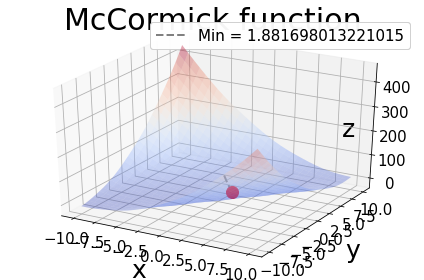

In [48]:
stepsNes, x_Nes, y_Nes, resNes, x_listNes, y_listNes, z_listNes = Nesterov_momentum(McCormickFunc, GradMcCormickFunc, x, y)
draw(McCormickFunc, -10, 10, -10, 10, 'McCormick function', x_listNes, y_listNes, z_listNes, 'McCormick_Nes_function.gif', stepsNes)
print('Nesterov momentum X result = ' + str(x_Nes) + '\n' + 
      'Nesterov momentum Y result = ' + str(y_Nes) + '\n' + 
      'Nesterov momentum function result = ' + str(resNes) + '\n' +
      'Epochs = ' + str(stepsNes) + '\n')

diff_x = abs(x_real - x_Nes)
diff_y = abs(y_real - y_Nes)
diff_f = abs(f_real - resNes)
print('Diffrence X result = ' + str(diff_x) + '\n' +
      'Diffrence Y result = ' + str(diff_y) + '\n' +
      'Diffrence function result = ' + str(diff_f) + '\n')

#### Adam метод

Adam momentum X result = -0.5447274758239451
Adam momentum Y result = -1.5445840861329752
Adam momentum function result = -1.9132117334167331
Epochs = 5093

Diffrence X result = 0.002462524176054859
Diffrence Y result = 0.0026059138670249116
Diffrence function result = 0.00011826658326685724



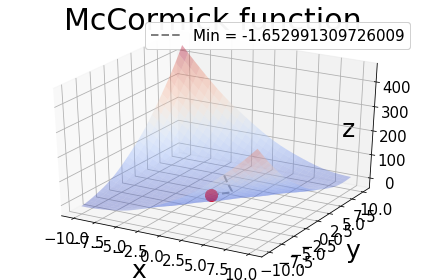

In [47]:
stepsAdam, x_Adam, y_Adam, resAdam, x_listAdam, y_listAdam, z_listAdam = Adam_momentum(McCormickFunc, GradMcCormickFunc, x, y)
draw(McCormickFunc, -10, 10, -10, 10, 'McCormick function', x_listAdam, y_listAdam, z_listAdam, 'McCormick_Adam_function.gif', stepsAdam)
print('Adam momentum X result = ' + str(x_Adam) + '\n' + 
      'Adam momentum Y result = ' + str(y_Adam) + '\n' + 
      'Adam momentum function result = ' + str(resAdam) + '\n' +
      'Epochs = ' + str(stepsAdam) + '\n')

diff_x = abs(x_real - x_Adam)
diff_y = abs(y_real - y_Adam)
diff_f = abs(f_real - resAdam)
print('Diffrence X result = ' + str(diff_x) + '\n' +
      'Diffrence Y result = ' + str(diff_y) + '\n' +
      'Diffrence function result = ' + str(diff_f) + '\n')